In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve
)
import joblib
sns.set(style="whitegrid")


In [9]:

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)
X_binary = X[(y == 0) | (y == 1)]
y_binary = y[(y == 0) | (y == 1)]
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 11824
Testing samples: 2956


In [10]:

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
joblib.dump(log_reg, "mnist_logistic_model.joblib")
joblib.dump(scaler, "mnist_scaler.joblib")
print("Model trained and saved successfully!")


Model trained and saved successfully!


In [11]:

y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")


Accuracy:  0.9983
Precision: 0.9994
Recall:    0.9975
F1 Score:  0.9984
ROC AUC:   1.0000


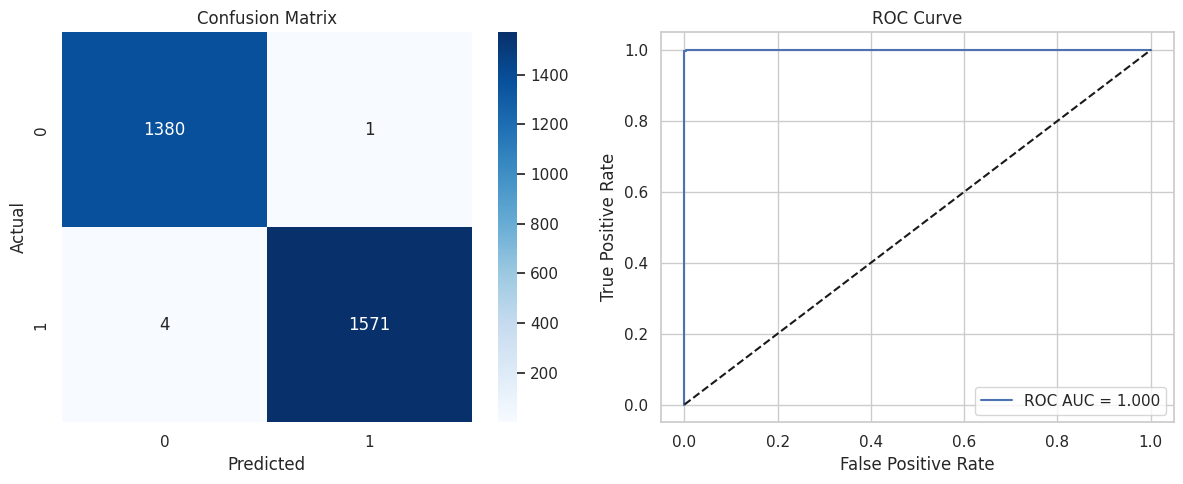

In [12]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")
fpr, tpr, _ = roc_curve(y_test, y_proba)
ax[1].plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_title("ROC Curve")
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")
ax[1].legend(loc="lower right")
plt.tight_layout()
plt.show()


In [13]:

summary = pd.DataFrame({
    "Model": ["Logistic Regression"],
    "Accuracy": [acc],
    "Precision": [prec],
    "Recall": [rec],
    "F1 Score": [f1],
    "ROC AUC": [roc_auc]
})
summary


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.998309,0.999364,0.99746,0.998411,0.999954
